In [6]:
import pandas as pd
import numpy as np
import copy
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
champion_stats = pd.read_csv("champ_career_stats.csv")
champion_stats

,champion,result,team_participation,earnedgoldshare,recent_result,recent_team_participation,recent_earnedgoldshare
0,Aatrox,0.511105,0.321069,0.222372,0.6,0.286357,0.239881
1,Ahri,0.507569,0.507925,0.230293,0.5,0.588011,0.228847
2,Akali,0.508029,0.371760,0.224991,0.2,0.478168,0.222146
3,Akshan,0.533040,0.336443,0.238132,0.6,0.372379,0.218880
4,Alistar,0.500528,0.436106,0.096377,0.8,0.362752,0.094245
...,...,...,...,...,...,...,...
160,Zeri,0.500000,0.522049,0.277970,0.4,0.423503,0.270391
161,Ziggs,0.472103,0.472326,0.247191,0.3,0.499864,0.255998
162,Zilean,0.483437,0.543857,0.152917,0.7,0.604455,0.096056
163,Zoe,0.519737,0.493776,0.223916,0.4,0.405332,0.226702


In [3]:
df = pd.read_csv("final_df.csv")
df

,gameid,participantid,pick1,pick2,pick3,pick4,pick5,result,opp_pick1,opp_pick2,...,OppPick_Yone,OppPick_Yorick,OppPick_Yuumi,OppPick_Zac,OppPick_Zed,OppPick_Zeri,OppPick_Ziggs,OppPick_Zilean,OppPick_Zoe,OppPick_Zyra
0,ESPORTSTMNT06/20195,100,Varus,Olaf,Miss Fortune,Nautilus,Aurelion Sol,1,Zyra,Kha'Zix,...,0,0,0,0,0,0,0,0,0,1
1,ESPORTSTMNT06/20195,200,Zyra,Kha'Zix,Syndra,Ezreal,Maokai,0,Varus,Olaf,...,0,0,0,0,0,0,0,0,0,0
2,ESPORTSTMNT06/20207,100,Varus,Elise,Zyra,Ahri,Poppy,1,Ashe,Olaf,...,0,0,0,0,0,0,0,0,0,0
3,ESPORTSTMNT06/20207,200,Ashe,Olaf,Miss Fortune,Taliyah,Nautilus,0,Varus,Elise,...,0,0,0,0,0,0,0,0,0,1
4,ESPORTSTMNT06/20215,100,Ryze,Olaf,Malzahar,Caitlyn,Nautilus,0,Ashe,Cassiopeia,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92439,ESPORTSTMNT03_3228396,200,Kalista,Renata Glasc,Yone,Ahri,Lee Sin,1,Maokai,Jayce,...,0,0,0,0,0,0,0,0,0,0
92440,ESPORTSTMNT03_3227846,100,Kalista,Senna,Maokai,Aatrox,Ahri,0,Renata Glasc,Draven,...,0,0,0,0,0,0,0,0,0,0
92441,ESPORTSTMNT03_3227846,200,Renata Glasc,Draven,Sylas,Nocturne,Gwen,1,Kalista,Senna,...,0,0,0,0,0,0,0,0,0,0
92442,ESPORTSTMNT03_3227847,100,Azir,Varus,Bard,Bel'Veth,Kennen,0,Xayah,Rakan,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = df["result"]
X = df.drop(
    [
        "participantid",
        "gameid",
        "result",
        "pick1",
        "pick2",
        "pick3",
        "pick4",
        "pick5",
        "opp_pick1",
        "opp_pick2",
        "opp_pick3",
        "opp_pick4",
        "opp_pick5",
    ],
    axis=1,
)
X_model, X_test, y_model, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_model, y_model, test_size=0.2, random_state=42
)

In [5]:
model = RandomForestClassifier().fit(X_train, y_train)

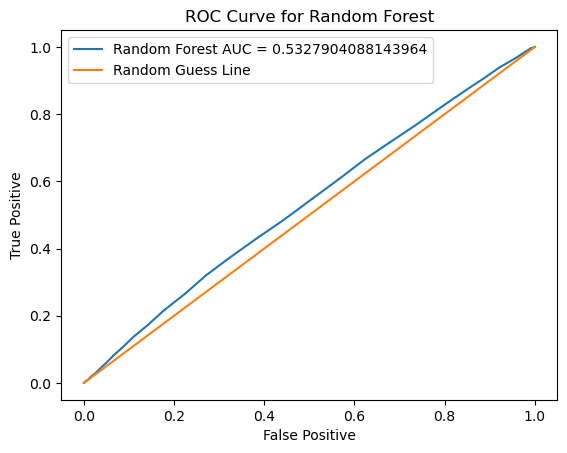

In [7]:
y_hat_model = model.predict_proba(X_val)[:, 1]
fpr_model, tpr_model, _ = roc_curve(y_val, y_hat_model)

plt.plot(fpr_model, tpr_model, label=f"Random Forest AUC = {auc(fpr_model, tpr_model)}")
plt.plot([0, 1.0], [0, 1.0], label="Random Guess Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title(f"ROC Curve for Random Forest")
plt.legend()

# Champion Recommender Functions

In [8]:
ohe_format = df.filter(regex="Pick_").columns
ohe_format

Index(['TeamPick_Aatrox', 'TeamPick_Ahri', 'TeamPick_Akali', 'TeamPick_Akshan',
       'TeamPick_Alistar', 'TeamPick_Amumu', 'TeamPick_Anivia',
       'TeamPick_Annie', 'TeamPick_Aphelios', 'TeamPick_Ashe',
       ...
       'OppPick_Yone', 'OppPick_Yorick', 'OppPick_Yuumi', 'OppPick_Zac',
       'OppPick_Zed', 'OppPick_Zeri', 'OppPick_Ziggs', 'OppPick_Zilean',
       'OppPick_Zoe', 'OppPick_Zyra'],
      dtype='object', length=330)

In [9]:
def predict_team(team, opp_team, ohe_format):
    interest_stat = ["result", "kills", "deaths", "assists"]
    column_name = ["pick", "opp_pick"]
    all_teams = [team, opp_team]
    team_header = ["TeamPick_", "OppPick_"]
    appending_column = []
    stats_array = []

    for i in range(1, 6):
        for side in range(2):
            for stat in interest_stat:
                temp_column_name = stat + "_stats_" + column_name[side] + str(i)
                temp_value = champion_stats[
                    champion_stats["champion"] == all_teams[side][i - 1]
                ][stat].iloc[0]
                appending_column.append(temp_column_name)
                stats_array.append(temp_value)

    temp_ohe_format = copy.deepcopy(ohe_format)
    stats_array.extend([0] * len(temp_ohe_format))
    temp_ohe_format = temp_ohe_format.insert(0, appending_column)

    entry = pd.DataFrame(columns=temp_ohe_format)
    entry.loc[(len(entry))] = stats_array
    for side in range(2):
        for champ in all_teams[side]:
            temp_name = team_header[side] + champ
            entry[temp_name] = 1.0

    final_prediction = model.predict_proba(entry)
    print(f"Your team has a predicted probability of {final_prediction[0][1]} to win")
    return final_prediction[0][1]